<a href="https://colab.research.google.com/github/DommiiUdomp/Well/blob/main/CleanWell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,789 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, box

%matplotlib inline

# **Import well data**

In [3]:
df = pd.read_excel('/content/Geological Log_4.xlsx', sheet_name='Simp3')
#df.drop(columns=['Unnamed: 0','Unnamed: 7','Unnamed: 28','Unnamed: 29' ], inplace=True)
df.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,K50,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,K77,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,Simplify,NaN,NaN,NaN,Layer Material Description,NaN,Simplify,NaN,NaN,...,NaN,Simplify,NaN,NaN,NaN,Layer Material Description,NaN,NaN,1.0,Clay
1,NaN,Layer,From,to,Thick.,NaN,NaN,Layer,From,to,...,NaN,Layer,From,to,Thick.,NaN,NaN,NaN,2.0,Silty clay


In [4]:
k50 = df.iloc[2:,2:6]

In [5]:
k50.columns

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'K50'], dtype='object')

In [6]:
k50.columns = (['From(m)','To(m)', 'Thick(m)', 'Lithology Description'])

In [7]:
k50.head(3)

,From(m),To(m),Thick(m),Lithology Description
2,0,11,11,"Top Soil, Silty clay, Clay"
3,11,61.6,50.6,Gravelly sand
4,61.6,65,3.4,Clay


In [8]:
k50.dropna(inplace=True)

In [9]:
k50['To(m)'] = k50['To(m)'].values.astype(float)
k50['From(m)'] = k50['From(m)'].values.astype(float)
k50['Thick(m)'] = k50['Thick(m)'].values.astype(float)

In [10]:
k50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 2 to 68
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   From(m)                67 non-null     float64
 1   To(m)                  67 non-null     float64
 2   Thick(m)               67 non-null     float64
 3   Lithology Description  67 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.6+ KB


In [11]:
k50['To(m)'] - k50['From(m)']== k50['Thick(m)']

2     True
3     True
4     True
5     True
6     True
      ... 
64    True
65    True
66    True
67    True
68    True
Length: 67, dtype: bool

In [12]:
def data(df):
  df.columns = (['From(m)','To(m)', 'Thick(m)', 'Lithology Description'])

  df['To(m)'] = df['To(m)'].values.astype(float)
  df['From(m)'] = df['From(m)'].values.astype(float)
  df['Thick(m)'] = df['Thick(m)'].values.astype(float)
  
  df.dropna(inplace=True)

  return df

In [13]:
k50 = df.iloc[2:,2:6]
k123 = df.iloc[2:,8:12]
k75 = df.iloc[2:,14:18]
k77 = df.iloc[2:,20:24]

In [14]:
k123 = data(k123)

In [15]:
k123

,From(m),To(m),Thick(m),Lithology Description
2,0.0,11.0,11.0,"Top Soil, Silty clay, Clay"
3,11.0,60.1,49.1,Gravelly sand
4,60.1,63.1,3.0,Clay
5,63.1,88.3,25.2,Gravelly sand
6,88.3,90.3,2.0,Clay
...,...,...,...,...
74,1085.5,1087.5,2.0,Silty clay
75,1087.5,1089.0,1.5,Sand
76,1089.0,1125.6,36.6,Silty sand and Silty clay
77,1125.6,1157.6,32.0,"Sand, sandstone"


In [16]:
k50 = data(k50)
k123 = data(k123)
k75 = data(k75)
k77 = data(k77)

In [17]:
k77.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 2 to 78
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   From(m)                77 non-null     float64
 1   To(m)                  77 non-null     float64
 2   Thick(m)               77 non-null     float64
 3   Lithology Description  77 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.0+ KB


# **Soil Type Details**

In [18]:
soil = pd.read_excel('/content/Geological Log_4.xlsx', sheet_name='Simp3 (2)')
#df.drop(columns=['Unnamed: 0','Unnamed: 7','Unnamed: 28','Unnamed: 29' ], inplace=True)
soil.head(2)

,Unnamed: 0,94.155,17,111.155,Unnamed: 4,Unnamed: 5,K50,Unnamed: 7,94.155.1,2,...,Unnamed: 26,K123,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,K(m/d),n,Ss,Sy
0,NaN,Simplify,NaN,NaN,NaN,NaN,Layer Material Description,NaN,Simplify,NaN,...,NaN,Layer Material Description,NaN,NaN,1.0,Clay,0.001780,0.36,0.0012,0.22
1,NaN,Layer,From,to,NaN,Thick.,NaN,NaN,Layer,From,...,Thick.,NaN,NaN,NaN,2.0,Silty clay,0.000432,0.20,0.0012,0.22


In [19]:
soil_type = soil.iloc[:13,31:]
soil_type

,Unnamed: 31,K(m/d),n,Ss,Sy
0,Clay,0.001780,0.36,0.00120,0.22
1,Silty clay,0.000432,0.20,0.00120,0.22
2,Lignite clay,0.001780,0.36,0.00120,0.22
3,Silty clay and Silty sand,1.728000,0.36,0.00005,0.32
4,Sand,432.000000,0.32,0.00005,0.32
5,Silty Sand,8.640000,0.30,0.00005,0.32
6,Gravelly sand,432.000000,0.32,0.00005,0.32
7,Siltstone,0.001780,0.36,0.00140,0.20
8,Clayey-Sandy Silt with interbed of Linite,0.043200,0.38,0.00140,0.20
9,Clayey-Sandy Silt with interbed of Sand,1.728000,0.36,0.00140,0.20


In [20]:
soil_type.columns

Index(['Unnamed: 31', 'K(m/d)', 'n', 'Ss', 'Sy'], dtype='object')

In [23]:
#not used
def eq_litho(data):
  eq = []
  cc = []
  for ee in data['Lithology Description']:
    for qq in range(soil_type['Lithology Description'].nunique()):
      if ee == soil_type['Lithology Description'].unique()[qq]:
        eq.append((ee,qq))
      
  eql = pd.DataFrame(eq, columns=['Lithology','Num'])

  for i in range(eql['Num'].nunique()):
    c = eql['Num'].unique()[i]
    t = soil_type['Lithology Description'].unique()[c]
    cc.append  ((c,t))
  return cc

In [24]:
soil_type = soil_type.sort_values(by='K(m/d)')
soil_type

,Unnamed: 31,K(m/d),n,Ss,Sy
1,Silty clay,0.000432,0.20,0.00120,0.22
0,Clay,0.001780,0.36,0.00120,0.22
2,Lignite clay,0.001780,0.36,0.00120,0.22
7,Siltstone,0.001780,0.36,0.00140,0.20
8,Clayey-Sandy Silt with interbed of Linite,0.043200,0.38,0.00140,0.20
11,Lignite-clayey siltstone,0.043200,0.38,0.00140,0.20
10,Clayey-Sandy Silt with interbed of Clay,0.432000,0.32,0.00140,0.20
3,Silty clay and Silty sand,1.728000,0.36,0.00005,0.32
9,Clayey-Sandy Silt with interbed of Sand,1.728000,0.36,0.00140,0.20
5,Silty Sand,8.640000,0.30,0.00005,0.32


In [25]:
soil_type.drop(index=[2,6,7,8,9,11,12],inplace=True)
soil_type

,Unnamed: 31,K(m/d),n,Ss,Sy
1,Silty clay,0.000432,0.20,0.00120,0.22
0,Clay,0.001780,0.36,0.00120,0.22
10,Clayey-Sandy Silt with interbed of Clay,0.432000,0.32,0.00140,0.20
3,Silty clay and Silty sand,1.728000,0.36,0.00005,0.32
5,Silty Sand,8.640000,0.30,0.00005,0.32
4,Sand,432.000000,0.32,0.00005,0.32


In [26]:
soil_type = soil_type.replace(['Clayey-Sandy Silt with interbed of Clay'],'Clayey-Sandy Silt')
soil_type

,Unnamed: 31,K(m/d),n,Ss,Sy
1,Silty clay,0.000432,0.20,0.00120,0.22
0,Clay,0.001780,0.36,0.00120,0.22
10,Clayey-Sandy Silt,0.432000,0.32,0.00140,0.20
3,Silty clay and Silty sand,1.728000,0.36,0.00005,0.32
5,Silty Sand,8.640000,0.30,0.00005,0.32
4,Sand,432.000000,0.32,0.00005,0.32


In [27]:
soil_type['Litho_Class'] = np.arange(1,7)

In [28]:
soil_type.rename(columns={'Unnamed: 31':'Lithology Description'},inplace=True)

In [29]:
k123['Lithology Description'].unique()

array(['Top Soil, Silty clay, Clay', 'Gravelly sand', 'Clay', 'Sand',
       'Silty clay', 'Silty clay and Silty sand',
       'Clayey-Sandy Silt with interbed of Clay', 'Silty sand',
       'Silty sand and Silty clay', 'Sand, sandstone', 'Clay '],
      dtype=object)

In [30]:
def simplify(data):
  data = data.replace(
      ['Clayey-Sandy Silt with interbed of Linite', 'Clayey-Sandy Silt with interbed of Sand',
       'Clayey-Sandy Silt with interbed of Clay', 'Lignite-clayey siltstone','Siltstone'],
       'Clayey-Sandy Silt')
  
  data = data.replace(
      ['Gravelly sand','Gravelly Sand','Sand, Sandstone','Sand, sandstone'],
      'Sand')
  
  data = data.replace(
      ['Fine-grained sand.', 'Silty sand and Silty clay', 'Top Soil, Silty clay, Clay','Clay ', 'Silty sand'],
      ['Sand','Silty clay and Silty sand', 'Silty clay', 'Clay', 'Silty Sand'])
  
  return data

In [31]:
k50['Lithology Description'] = simplify(k50['Lithology Description'])
print(k50['Lithology Description'].unique())

['Silty clay' 'Sand' 'Clay' 'Clayey-Sandy Silt'
 'Silty clay and Silty sand']


In [32]:
k50['Lithology Description'].nunique()

5

In [33]:
k123['Lithology Description'] = simplify(k123['Lithology Description'])
k75['Lithology Description'] = simplify(k75['Lithology Description'])
k77['Lithology Description'] = simplify(k77['Lithology Description'])
print(k123['Lithology Description'].nunique())
print(k75['Lithology Description'].nunique())
print(k77['Lithology Description'].nunique())

6
4
5


In [34]:
print(k123['Lithology Description'].unique()[5])

Silty Sand


In [35]:
k123['Lithology Description'].values[1]

'Sand'

In [36]:
soil_type['Lithology Description'][1]

'Silty clay'

In [37]:
def litho(data):
  grid = []
  for p in data['Lithology Description']:#.unique():
    for q in range(data['Lithology Description'].nunique()):
      if p == data['Lithology Description'].unique()[q]:
        #num = (p,q)
      #print(num)
        grid.append((p,q))
  litho = pd.DataFrame(grid, columns=['Lithology Description','Num'])

  litho_k = pd.concat([data,litho],ignore_index=True,axis=1,join='inner')
  litho_k.columns = (['From(m)','To(m)', 'Thick(m)', 'Lithology', 'Litho', 'Litho_class'])
  litho_k['Litho_class'] = litho_k['Litho_class'].astype(float)

  litho_k.drop(columns='Litho',inplace=True)

  return litho_k

In [38]:
left = k123
right = soil_type
left.merge(right, on='Lithology Description', how='left', indicator=True)

,From(m),To(m),Thick(m),Lithology Description,K(m/d),n,Ss,Sy,Litho_Class,_merge
0,0.0,11.0,11.0,Silty clay,0.000432,0.20,0.00120,0.22,1,both
1,11.0,60.1,49.1,Sand,432.000000,0.32,0.00005,0.32,6,both
2,60.1,63.1,3.0,Clay,0.001780,0.36,0.00120,0.22,2,both
3,63.1,88.3,25.2,Sand,432.000000,0.32,0.00005,0.32,6,both
4,88.3,90.3,2.0,Clay,0.001780,0.36,0.00120,0.22,2,both
...,...,...,...,...,...,...,...,...,...,...
72,1085.5,1087.5,2.0,Silty clay,0.000432,0.20,0.00120,0.22,1,both
73,1087.5,1089.0,1.5,Sand,432.000000,0.32,0.00005,0.32,6,both
74,1089.0,1125.6,36.6,Silty clay and Silty sand,1.728000,0.36,0.00005,0.32,4,both
75,1125.6,1157.6,32.0,Sand,432.000000,0.32,0.00005,0.32,6,both


In [130]:
merge_k50 = k50.merge(soil_type, on='Lithology Description', how='left', indicator=True)
merge_k123 = k123.merge(soil_type, on='Lithology Description', how='left', indicator=True)
merge_k75 = k75.merge(soil_type, on='Lithology Description', how='left', indicator=True)
merge_k77 = k77.merge(soil_type, on='Lithology Description', how='left', indicator=True)
print(merge_k50.shape)
print(merge_k123.shape)
print(merge_k75.shape)
print(merge_k77.shape)

(67, 10)
(77, 10)
(47, 10)
(77, 10)


In [40]:
((merge_k123['_merge'] == 'both').astype(int)).sum()

77

In [41]:
merge_k123[merge_k123['_merge'].str.contains('left_only')]

,From(m),To(m),Thick(m),Lithology Description,K(m/d),n,Ss,Sy,Litho_Class,_merge


In [42]:
merge_k123['Litho_Class'] = merge_k123['Litho_Class'].astype(float)

In [43]:
merge_k123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   From(m)                77 non-null     float64 
 1   To(m)                  77 non-null     float64 
 2   Thick(m)               77 non-null     float64 
 3   Lithology Description  77 non-null     object  
 4   K(m/d)                 77 non-null     float64 
 5   n                      77 non-null     float64 
 6   Ss                     77 non-null     float64 
 7   Sy                     77 non-null     float64 
 8   Litho_Class            77 non-null     float64 
 9   _merge                 77 non-null     category
dtypes: category(1), float64(8), object(1)
memory usage: 6.2+ KB


# ***Exploration Data***

In [44]:
fig = px.scatter(merge_k50, x='Lithology Description', y="To(m)", color='Lithology Description')

#plt.gca().invert_yaxis()
fig.update_yaxes(autorange="reversed")
fig.show()

In [45]:
fig = px.bar(merge_k50, x='Lithology Description', y="Thick(m)", color='Lithology Description',
             pattern_shape="Litho_Class", pattern_shape_sequence=[".", "x", "+",".", "x", "+"] ) 
fig.update_yaxes(autorange="reversed")
fig.show()

In [46]:
soil_type['Lithology Description'].values

array(['Silty clay', 'Clay', 'Clayey-Sandy Silt',
       'Silty clay and Silty sand', 'Silty Sand', 'Sand'], dtype=object)

In [47]:
soil_type['Litho_Class'][5]

5

In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(line = dict(color = soil_type['Litho_Class'][5], 
                             colorscale = 'Electric',
                             showscale = True,
                             cmin = 1,
                             cmax = 6 ),
                 dimensions = list([
                                      dict(range = [0,merge_k50["To(m)"].max()], 
                                           label = "K50", values = merge_k50["To(m)"] ),
                                      dict(range = [0,merge_k123["To(m)"].max()], 
                                           label = "K123", values = merge_k123["To(m)"] ),
                                      dict(range = [0,merge_k75["To(m)"].max()],
                                           label = "K75", values = merge_k75["To(m)"] ),
                                      dict(range = [0,merge_k77["To(m)"].max()],
                                           label = "K77", values = merge_k77["To(m)"] )
                                      ]) 
                   )
)
fig.update_yaxes(autorange="reversed")
fig.show()

# ***Set Up the Aquifer Only***

In [128]:
def aquifer(data):
  data.drop(columns=['_merge'],inplace=True)

  k = data['K(m/d)']>100 
  thk = data['Thick(m)']>10
  dpt = data['To(m)']>100
  dpb = data['To(m)']<1000
  data = data[k&thk&dpt&dpb]
  return data

In [131]:
aq_50 = aquifer(merge_k50)
aq_50

,From(m),To(m),Thick(m),Lithology Description,K(m/d),n,Ss,Sy,Litho_Class
7,100.2,115.0,14.8,Sand,432.0,0.32,0.00005,0.32,6
11,130.0,141.6,11.6,Sand,432.0,0.32,0.00005,0.32,6
13,147.0,159.0,12.0,Sand,432.0,0.32,0.00005,0.32,6
15,163.0,187.0,24.0,Sand,432.0,0.32,0.00005,0.32,6
25,479.0,495.0,16.0,Sand,432.0,0.32,0.00005,0.32,6
31,617.6,629.0,11.4,Sand,432.0,0.32,0.00005,0.32,6


In [132]:
aq_123 = aquifer(merge_k123)
aq_75 = aquifer(merge_k75)
aq_77 = aquifer(merge_k77)

In [133]:
aq_123

,From(m),To(m),Thick(m),Lithology Description,K(m/d),n,Ss,Sy,Litho_Class
17,148.3,159.8,11.5,Sand,432.0,0.32,0.00005,0.32,6
21,169.6,194.0,24.4,Sand,432.0,0.32,0.00005,0.32,6
33,484.2,496.0,11.8,Sand,432.0,0.32,0.00005,0.32,6


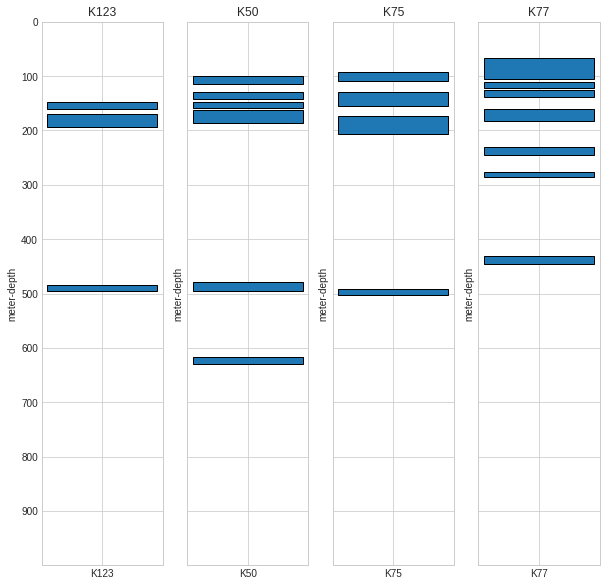

In [136]:
fig, ax= plt.subplots(nrows=1,ncols=4, sharey=True, figsize=(10,10))

ax[0].bar(['K123'], height = aq_123['Thick(m)'], bottom = aq_123['From(m)'], edgecolor = 'black')
ax[0].set_yticks(np.arange(0,1000,100))
ax[0].set_ylabel('meter-depth')
ax[0].set_ylim([1000,0])
ax[0].set_title('K123')

ax[1].bar(['K50'], height = aq_50['Thick(m)'], bottom = aq_50['From(m)'], edgecolor = 'black')
ax[1].set_yticks(np.arange(0,1000,100))
ax[1].set_ylabel('meter-depth')
ax[1].set_ylim([1000,0])
ax[1].set_title('K50')

ax[2].bar(['K75'], height = aq_75['Thick(m)'], bottom = aq_75['From(m)'], edgecolor = 'black')
ax[2].set_yticks(np.arange(0,1000,100))
ax[2].set_ylabel('meter-depth')
ax[2].set_ylim([1000,0])
ax[2].set_title('K75')

ax[3].bar(['K77'], height = aq_77['Thick(m)'], bottom = aq_77['From(m)'], edgecolor = 'black')
ax[3].set_yticks(np.arange(0,1000,100))
ax[3].set_ylabel('meter-depth')
ax[3].set_ylim([1000,0])
ax[3].set_title('K77')

plt.show()